In [1]:
from qiskit import *
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
IBMQ.load_accounts()
%matplotlib inline

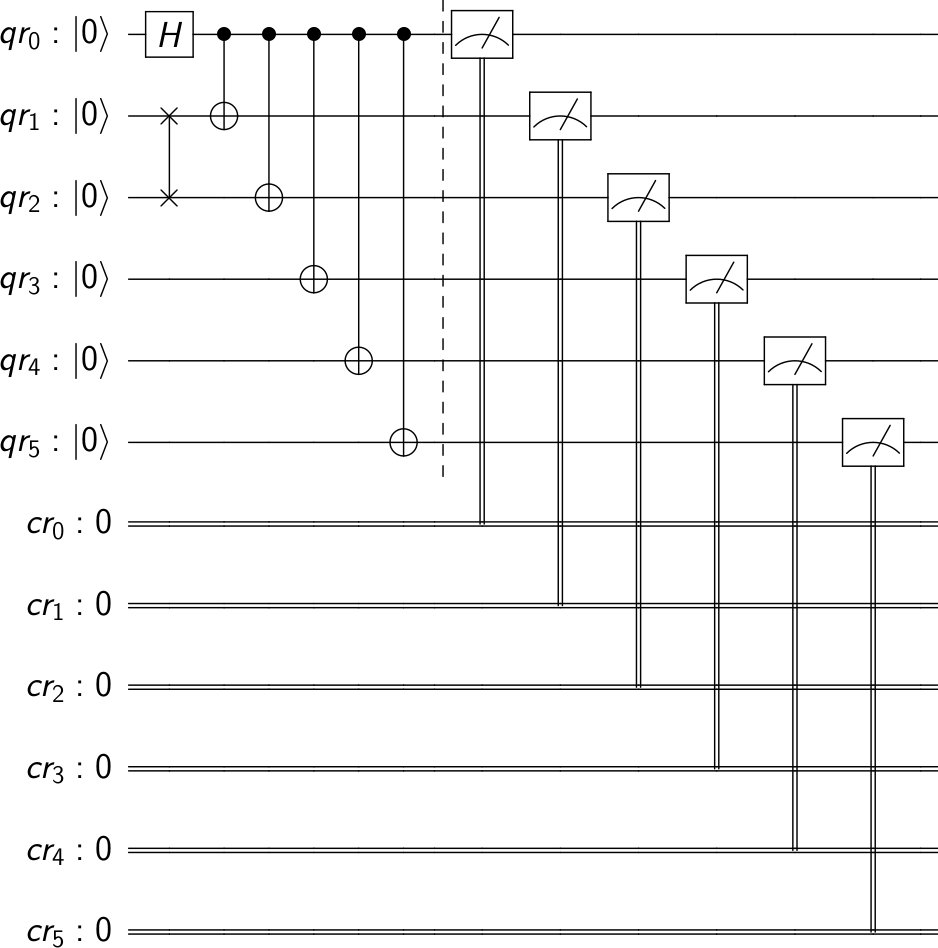

In [2]:
qr = QuantumRegister(6, 'qr')
cr = ClassicalRegister(6, 'cr')
ghz = QuantumCircuit(qr, cr, name='ghz')

ghz.h(qr[0])
ghz.swap(qr[1],qr[2])
ghz.cx(qr[0], qr[1])
ghz.cx(qr[0], qr[2])
ghz.cx(qr[0], qr[3])
ghz.cx(qr[0], qr[4])
ghz.cx(qr[0], qr[5])
ghz.barrier(qr)
ghz.measure(qr, cr)
# ghz.draw(output='latex')
ghz.draw(output='latex')

In [3]:
device = IBMQ.get_backend('ibmq_16_melbourne')

In [4]:
trans_ghz = transpile(ghz, device, basis_gates=['u1', 'u2', 'u3', 'cx', 'h', 's', 'swap', 'x', 'y', 'z'])

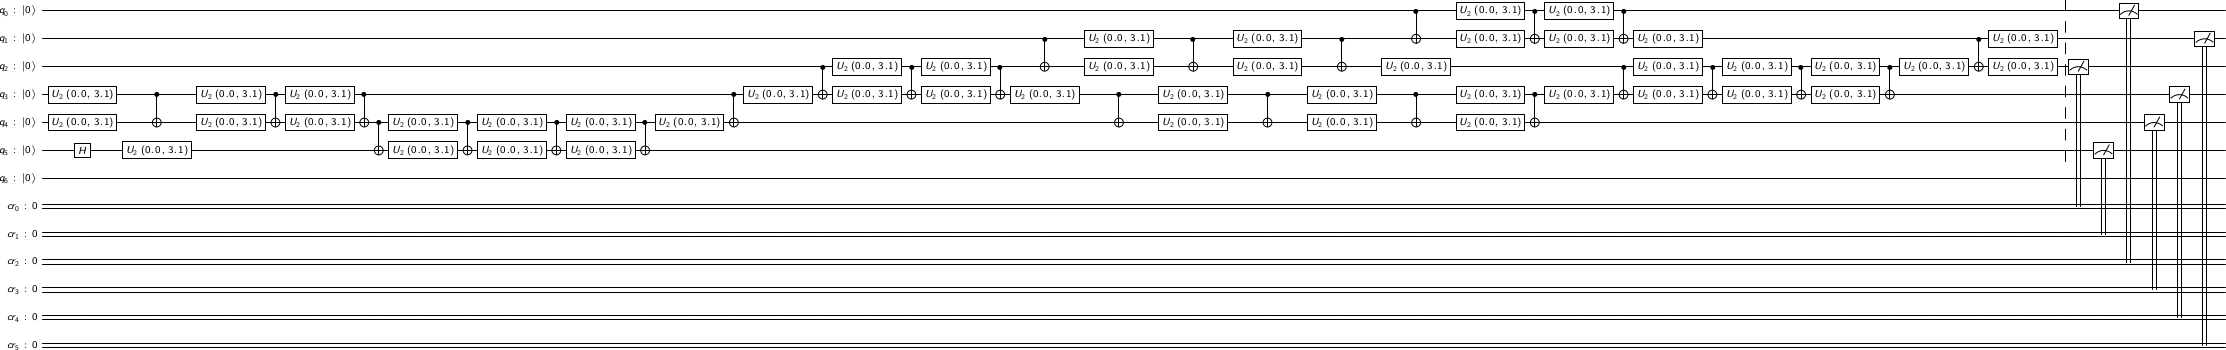

In [5]:
trans_ghz = transpile(ghz, device, basis_gates=['swap','u1', 'u2', 'u3', 'cx', 'cz', 'id', 'x', 'y', 'z',
                         'h', 's', 'sdg', 't', 'tdg', 'ccx', 'swap',
                         'snapshot', 'unitary'], 
                      coupling_map=[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]],
#                       initial_layout=[0,1,2,3,4,5]
                      initial_layout=[1,2,4,5,3, 0]
                     )
trans_ghz.draw(output='latex', scale=0.25)